In [1]:
import xarray as xr
from xcube.core.rectify import rectify_dataset

In [2]:
def imshow(var):
    var.plot.imshow(figsize=(16,16), vmax=0.25, cmap='gray')

In [3]:
src_ds = xr.open_zarr('S3-OLCI-L2A.zarr.zip')
src_ds

<xarray.Dataset>
Dimensions:        (x: 1189, y: 1890)
Coordinates:
    lat            (y, x) float64 dask.array<chunksize=(512, 512), meta=np.ndarray>
    lon            (y, x) float64 dask.array<chunksize=(512, 512), meta=np.ndarray>
Dimensions without coordinates: x, y
Data variables:
    quality_flags  (y, x) uint32 dask.array<chunksize=(512, 512), meta=np.ndarray>
    rtoa_3         (y, x) float32 dask.array<chunksize=(512, 512), meta=np.ndarray>
    rtoa_6         (y, x) float32 dask.array<chunksize=(512, 512), meta=np.ndarray>
    rtoa_8         (y, x) float32 dask.array<chunksize=(512, 512), meta=np.ndarray>
Attributes:
    Conventions:   CF-1.4
    product_type:  C2RCC_OLCI
    start_date:    04-JUL-2018 09:21:55.677316
    stop_date:     04-JUL-2018 09:23:18.811790

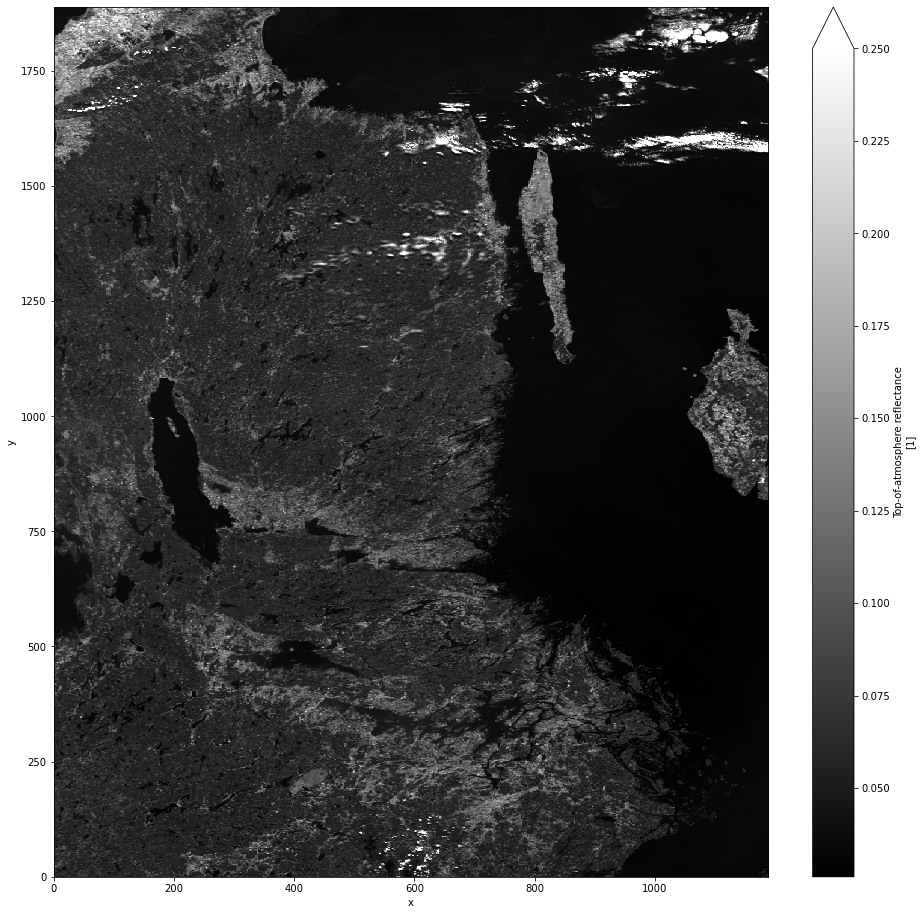

In [4]:
imshow(src_ds.rtoa_8)

In [5]:
%%time
dst_ds = rectify_dataset(src_ds, var_names='rtoa_8', tile_size=2048)
dst_ds

Wall time: 3.23 s


<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 5551, lon: 7462)
Coordinates:
  * lat       (lat) float64 60.64 60.64 60.64 60.64 ... 55.2 55.2 55.2 55.2
  * lon       (lon) float64 12.69 12.7 12.7 12.7 12.7 ... 20.0 20.0 20.01 20.01
    lon_bnds  (lon, bnds) float64 12.69 12.69 12.69 12.7 ... 20.01 20.01 20.01
    lat_bnds  (lat, bnds) float64 60.64 60.64 60.64 60.64 ... 55.2 55.2 55.2
Dimensions without coordinates: bnds
Data variables:
    rtoa_8    (lat, lon) float32 dask.array<chunksize=(2048, 2048), meta=np.ndarray>
Attributes:
    Conventions:   CF-1.4
    product_type:  C2RCC_OLCI
    start_date:    04-JUL-2018 09:21:55.677316
    stop_date:     04-JUL-2018 09:23:18.811790

Wall time: 3.42 s


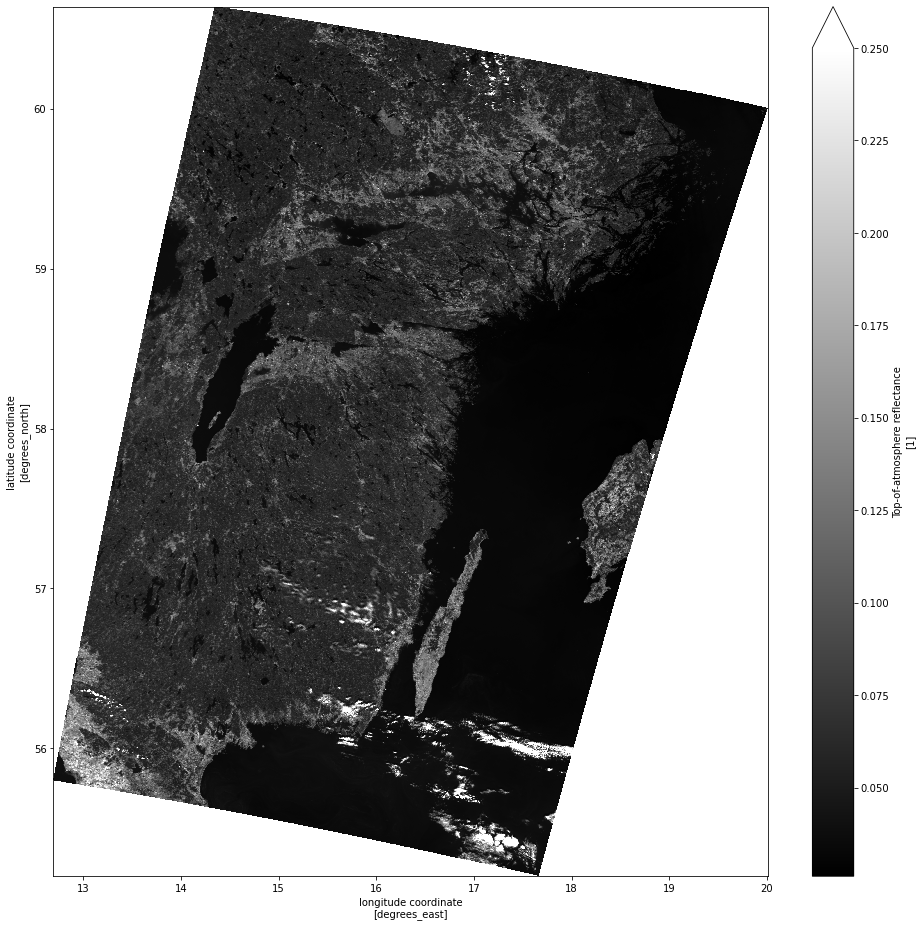

In [6]:
%%time
imshow(dst_ds.rtoa_8)

In [7]:
%%time
dst_ds = rectify_dataset(src_ds, var_names='rtoa_8', tile_size=None)
dst_ds

Wall time: 5.5 s


<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 5551, lon: 7462)
Coordinates:
  * lat       (lat) float64 60.64 60.64 60.64 60.64 ... 55.2 55.2 55.2 55.2
  * lon       (lon) float64 12.69 12.7 12.7 12.7 12.7 ... 20.0 20.0 20.01 20.01
    lon_bnds  (lon, bnds) float64 12.69 12.69 12.69 12.7 ... 20.01 20.01 20.01
    lat_bnds  (lat, bnds) float64 60.64 60.64 60.64 60.64 ... 55.2 55.2 55.2
Dimensions without coordinates: bnds
Data variables:
    rtoa_8    (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    Conventions:   CF-1.4
    product_type:  C2RCC_OLCI
    start_date:    04-JUL-2018 09:21:55.677316
    stop_date:     04-JUL-2018 09:23:18.811790

Wall time: 838 ms


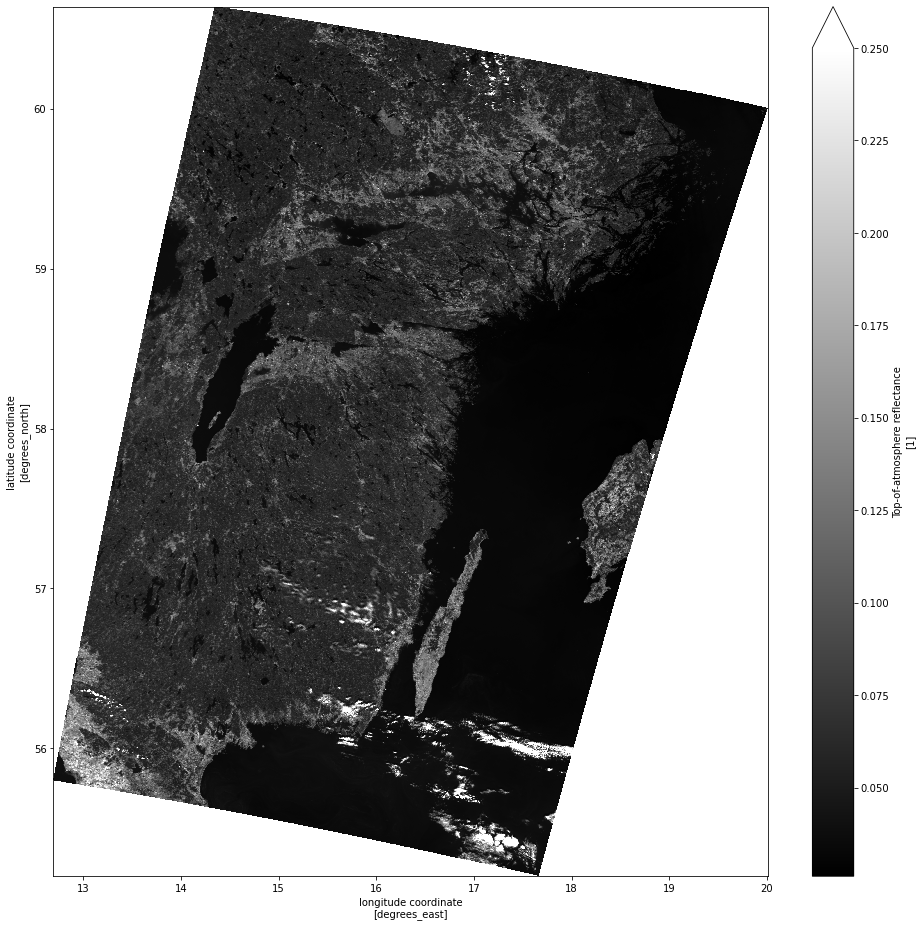

In [8]:
%%time
imshow(dst_ds.rtoa_8)

Wall time: 720 ms


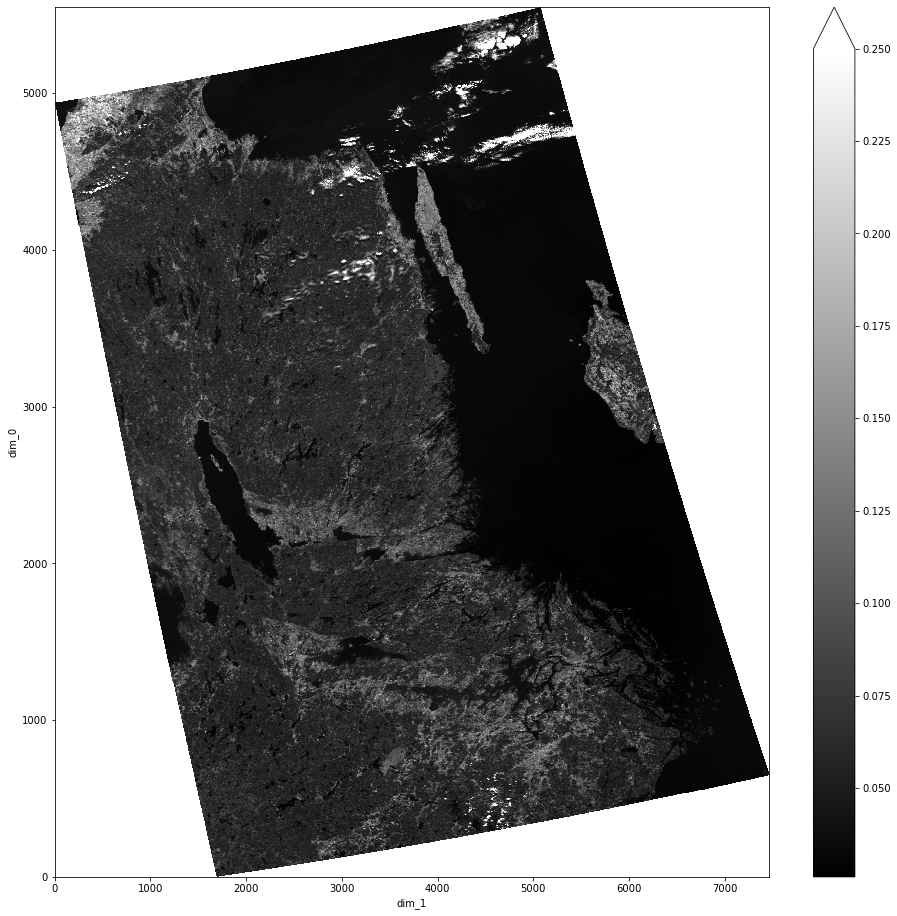

In [9]:
%%time
imshow(xr.DataArray(dst_ds.rtoa_8.values))

In [10]:
%%time
dst_ds = rectify_dataset(src_ds, var_names='rtoa_8', tile_size=None, is_j_axis_up=True)
dst_ds

Wall time: 4.88 s


<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 5551, lon: 7462)
Coordinates:
  * lat       (lat) float64 55.2 55.2 55.2 55.2 55.2 ... 60.64 60.64 60.64 60.64
  * lon       (lon) float64 12.69 12.7 12.7 12.7 12.7 ... 20.0 20.0 20.01 20.01
    lon_bnds  (lon, bnds) float64 12.69 12.69 12.69 12.7 ... 20.01 20.01 20.01
    lat_bnds  (lat, bnds) float64 55.2 55.2 55.2 55.2 ... 60.64 60.64 60.64
Dimensions without coordinates: bnds
Data variables:
    rtoa_8    (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    Conventions:   CF-1.4
    product_type:  C2RCC_OLCI
    start_date:    04-JUL-2018 09:21:55.677316
    stop_date:     04-JUL-2018 09:23:18.811790

In [11]:
%%time
imshow(dst_ds.rtoa_8)

Wall time: 726 ms


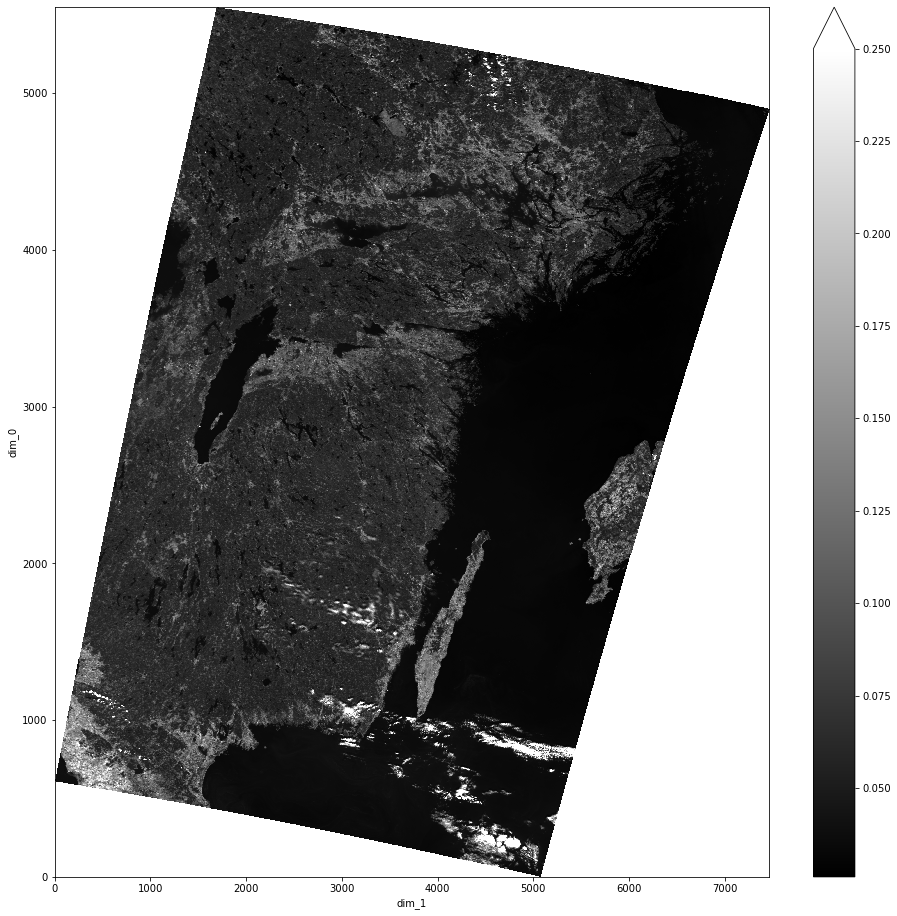

In [12]:
imshow(xr.DataArray(dst_ds.rtoa_8.values))